In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, metrics

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, cross_validate, GridSearchCV
from sklearn import feature_selection, model_selection, metrics

import matplotlib as mpl
import matplotlib.pylab as pylab
from pandas.plotting import scatter_matrix

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
data_df = train_df.append(test_df)

C:\Users\User\AppData\Local\Temp\ipykernel_16128\846197102.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = train_df.append(test_df)


In [4]:
data_df['Title'] = data_df['Name']
for name_string in data_df['Name']:
    data_df['Title'] = data_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
data_df.replace({'Title': mapping}, inplace=True)
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in titles:
    age_to_impute = data_df.groupby('Title')['Age'].median()[titles.index(title)]
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == title), 'Age'] = age_to_impute
    
# Substituting Age values in TRAIN_DF and TEST_DF:
train_df['Age'] = data_df['Age'][:891]
test_df['Age'] = data_df['Age'][891:]

# Dropping Title feature
data_df.drop('Title', axis = 1, inplace = True)

In [5]:
data_df['Family_Size'] = data_df['Parch'] + data_df['SibSp']

# Substituting Age values in TRAIN_DF and TEST_DF:
train_df['Family_Size'] = data_df['Family_Size'][:891]
test_df['Family_Size'] = data_df['Family_Size'][891:]

In [6]:
data_df['Last_Name'] = data_df['Name'].apply(lambda x: str.split(x, ",")[0])
data_df['Fare'].fillna(data_df['Fare'].mean(), inplace=True)

DEFAULT_SURVIVAL_VALUE = 0.5
data_df['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in data_df[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0

print("Number of passengers with family survival information:", 
      data_df.loc[data_df['Family_Survival']!=0.5].shape[0])

Number of passengers with family survival information: 420


In [7]:
for _, grp_df in data_df.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0
                        
print("Number of passenger with family/group survival information: " 
      +str(data_df[data_df['Family_Survival']!=0.5].shape[0]))

# # Family_Survival in TRAIN_DF and TEST_DF:
train_df['Family_Survival'] = data_df['Family_Survival'][:891]
test_df['Family_Survival'] = data_df['Family_Survival'][891:]

Number of passenger with family/group survival information: 546


In [8]:
data_df['Fare'].fillna(data_df['Fare'].median(), inplace = True)
data_df['FareBin'] = pd.qcut(data_df['Fare'], 5)

label = LabelEncoder()
data_df['FareBin_Code'] = label.fit_transform(data_df['FareBin'])

train_df['FareBin_Code'] = data_df['FareBin_Code'][:891]
test_df['FareBin_Code'] = data_df['FareBin_Code'][891:]

train_df.drop(['Fare'], 1, inplace=True)
test_df.drop(['Fare'], 1, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16128\817659449.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_df.drop(['Fare'], 1, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16128\817659449.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_df.drop(['Fare'], 1, inplace=True)


In [9]:
data_df['AgeBin'] = pd.qcut(data_df['Age'], 4)

label = LabelEncoder()
data_df['AgeBin_Code'] = label.fit_transform(data_df['AgeBin'])

train_df['AgeBin_Code'] = data_df['AgeBin_Code'][:891]
test_df['AgeBin_Code'] = data_df['AgeBin_Code'][891:]

train_df.drop(['Age'], 1, inplace=True)
test_df.drop(['Age'], 1, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16128\11583694.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_df.drop(['Age'], 1, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16128\11583694.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_df.drop(['Age'], 1, inplace=True)


In [10]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

train_df.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
               'Embarked'], axis = 1, inplace = True)
test_df.drop(['Name','PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
              'Embarked'], axis = 1, inplace = True)

In [11]:
train_df.head(3)

,Survived,Pclass,Sex,Family_Size,Family_Survival,FareBin_Code,AgeBin_Code
0,0,3,0,1,0.5,0,0
1,1,1,1,1,0.5,4,3
2,1,3,1,0,0.5,1,1


In [12]:
X = train_df.drop('Survived', 1)
y = train_df['Survived']
X_test = test_df.copy()

C:\Users\User\AppData\Local\Temp\ipykernel_16128\246681801.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train_df.drop('Survived', 1)


In [13]:
feat = X.columns.tolist()

In [14]:
feat

['Pclass',
 'Sex',
 'Family_Size',
 'Family_Survival',
 'FareBin_Code',
 'AgeBin_Code']

In [15]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

In [16]:
X

array([[ 0.82737724, -0.73769513,  0.05915988, -0.06066122, -1.40714389,
        -1.1437807 ],
       [-1.56610693,  1.35557354,  0.05915988, -0.06066122,  1.42942897,
         1.54043863],
       [ 0.82737724,  1.35557354, -0.56097483, -0.06066122, -0.69800067,
        -0.24904093],
       ...,
       [ 0.82737724,  1.35557354,  1.29942929, -1.60492259,  0.72028576,
        -1.1437807 ],
       [-1.56610693, -0.73769513, -0.56097483, -0.06066122,  0.72028576,
        -0.24904093],
       [ 0.82737724, -0.73769513, -0.56097483, -0.06066122, -1.40714389,
         0.64569885]])

In [17]:
df = pd.DataFrame(X)

In [18]:
df_y = pd.DataFrame(y)

In [19]:
df

,0,1,2,3,4,5
0,0.827377,-0.737695,0.059160,-0.060661,-1.407144,-1.143781
1,-1.566107,1.355574,0.059160,-0.060661,1.429429,1.540439
2,0.827377,1.355574,-0.560975,-0.060661,-0.698001,-0.249041
3,-1.566107,1.355574,0.059160,-1.604923,1.429429,0.645699
4,0.827377,-0.737695,-0.560975,-0.060661,-0.698001,0.645699
...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.560975,-0.060661,0.011143,-0.249041
887,-1.566107,1.355574,-0.560975,-0.060661,0.720286,-1.143781
888,0.827377,1.355574,1.299429,-1.604923,0.720286,-1.143781
889,-1.566107,-0.737695,-0.560975,-0.060661,0.720286,-0.249041


# KNN

In [21]:
n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = "roc_auc")
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
0.8783650227767875
KNeighborsClassifier(leaf_size=26, n_neighbors=16)


In [22]:
gd.best_estimator_.fit(X, y)
y_pred = gd.best_estimator_.predict(X_test)

In [23]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=6, p=2, 
                           weights='uniform')
knn.fit(X, y)
y_pred = knn.predict(X_test)

In [24]:
temp = pd.DataFrame(pd.read_csv("test.csv")['PassengerId'])
temp['Survived'] = y_pred
#temp.to_csv("./submission.csv", index = False)

# Decision Tree

In [26]:
dt = DecisionTreeClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV

In [27]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [28]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [29]:
%%time
grid_search.fit(X, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: total: 422 ms
Wall time: 5.68 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [30]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024465,0.025347,0.005014,0.007530,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.748603,0.803371,0.820225,0.786517,0.820225,0.795788,0.026699,25
1,0.003209,0.000401,0.001204,0.000401,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.748603,0.803371,0.820225,0.786517,0.820225,0.795788,0.026699,25
2,0.002606,0.000492,0.001204,0.000401,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.748603,0.803371,0.820225,0.786517,0.820225,0.795788,0.026699,25
3,0.003007,0.000636,0.001202,0.000403,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.748603,0.803371,0.820225,0.786517,0.820225,0.795788,0.026699,25
4,0.003810,0.001331,0.001404,0.000491,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.748603,0.792135,0.786517,0.752809,0.786517,0.773316,0.018622,37


In [31]:
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024465,0.025347,0.005014,7.529843e-03,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.748603,0.803371,0.820225,0.786517,0.820225,0.795788,0.026699,25
1,0.003209,0.000401,0.001204,4.009266e-04,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.748603,0.803371,0.820225,0.786517,0.820225,0.795788,0.026699,25
2,0.002606,0.000492,0.001204,4.010942e-04,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.748603,0.803371,0.820225,0.786517,0.820225,0.795788,0.026699,25
3,0.003007,0.000636,0.001202,4.028129e-04,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.748603,0.803371,0.820225,0.786517,0.820225,0.795788,0.026699,25
4,0.003810,0.001331,0.001404,4.914784e-04,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.748603,0.792135,0.786517,0.752809,0.786517,0.773316,0.018622,37
5,0.003610,0.001861,0.001805,1.169532e-03,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.849162,0.842697,0.842697,0.825843,0.848315,0.841743,0.008401,9
6,0.002206,0.000401,0.001003,3.371748e-07,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793296,0.842697,0.842697,0.825843,0.848315,0.830569,0.020103,11
7,0.002607,0.000491,0.002207,1.945522e-03,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793296,0.814607,0.808989,0.797753,0.848315,0.812592,0.019420,21
8,0.002807,0.000401,0.001403,4.915405e-04,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.748603,0.803371,0.820225,0.786517,0.820225,0.795788,0.026699,25
9,0.004814,0.002142,0.001203,4.016649e-04,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.748603,0.792135,0.786517,0.752809,0.786517,0.773316,0.018622,37


In [32]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.009224,0.007647,0.001002,4.909339e-07,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.888268,0.820225,0.848315,0.831461,0.848315,0.847317,0.023084,1
35,0.003007,0.000634,0.001003,1.862719e-06,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.882682,0.820225,0.848315,0.831461,0.848315,0.846199,0.021127,2
11,0.003008,0.000634,0.001003,7.294206e-07,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.865922,0.808989,0.859551,0.842697,0.848315,0.845094,0.019812,3
16,0.008622,0.005764,0.001404,4.915960e-04,gini,10,10,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.865922,0.808989,0.859551,0.842697,0.848315,0.845094,0.019812,3
21,0.003409,0.000803,0.001805,1.169770e-03,gini,20,10,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.865922,0.808989,0.859551,0.842697,0.848315,0.845094,0.019812,3


In [33]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [34]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}

In [35]:
dt_best = grid_search.best_estimator_ # criterior is by default gini

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

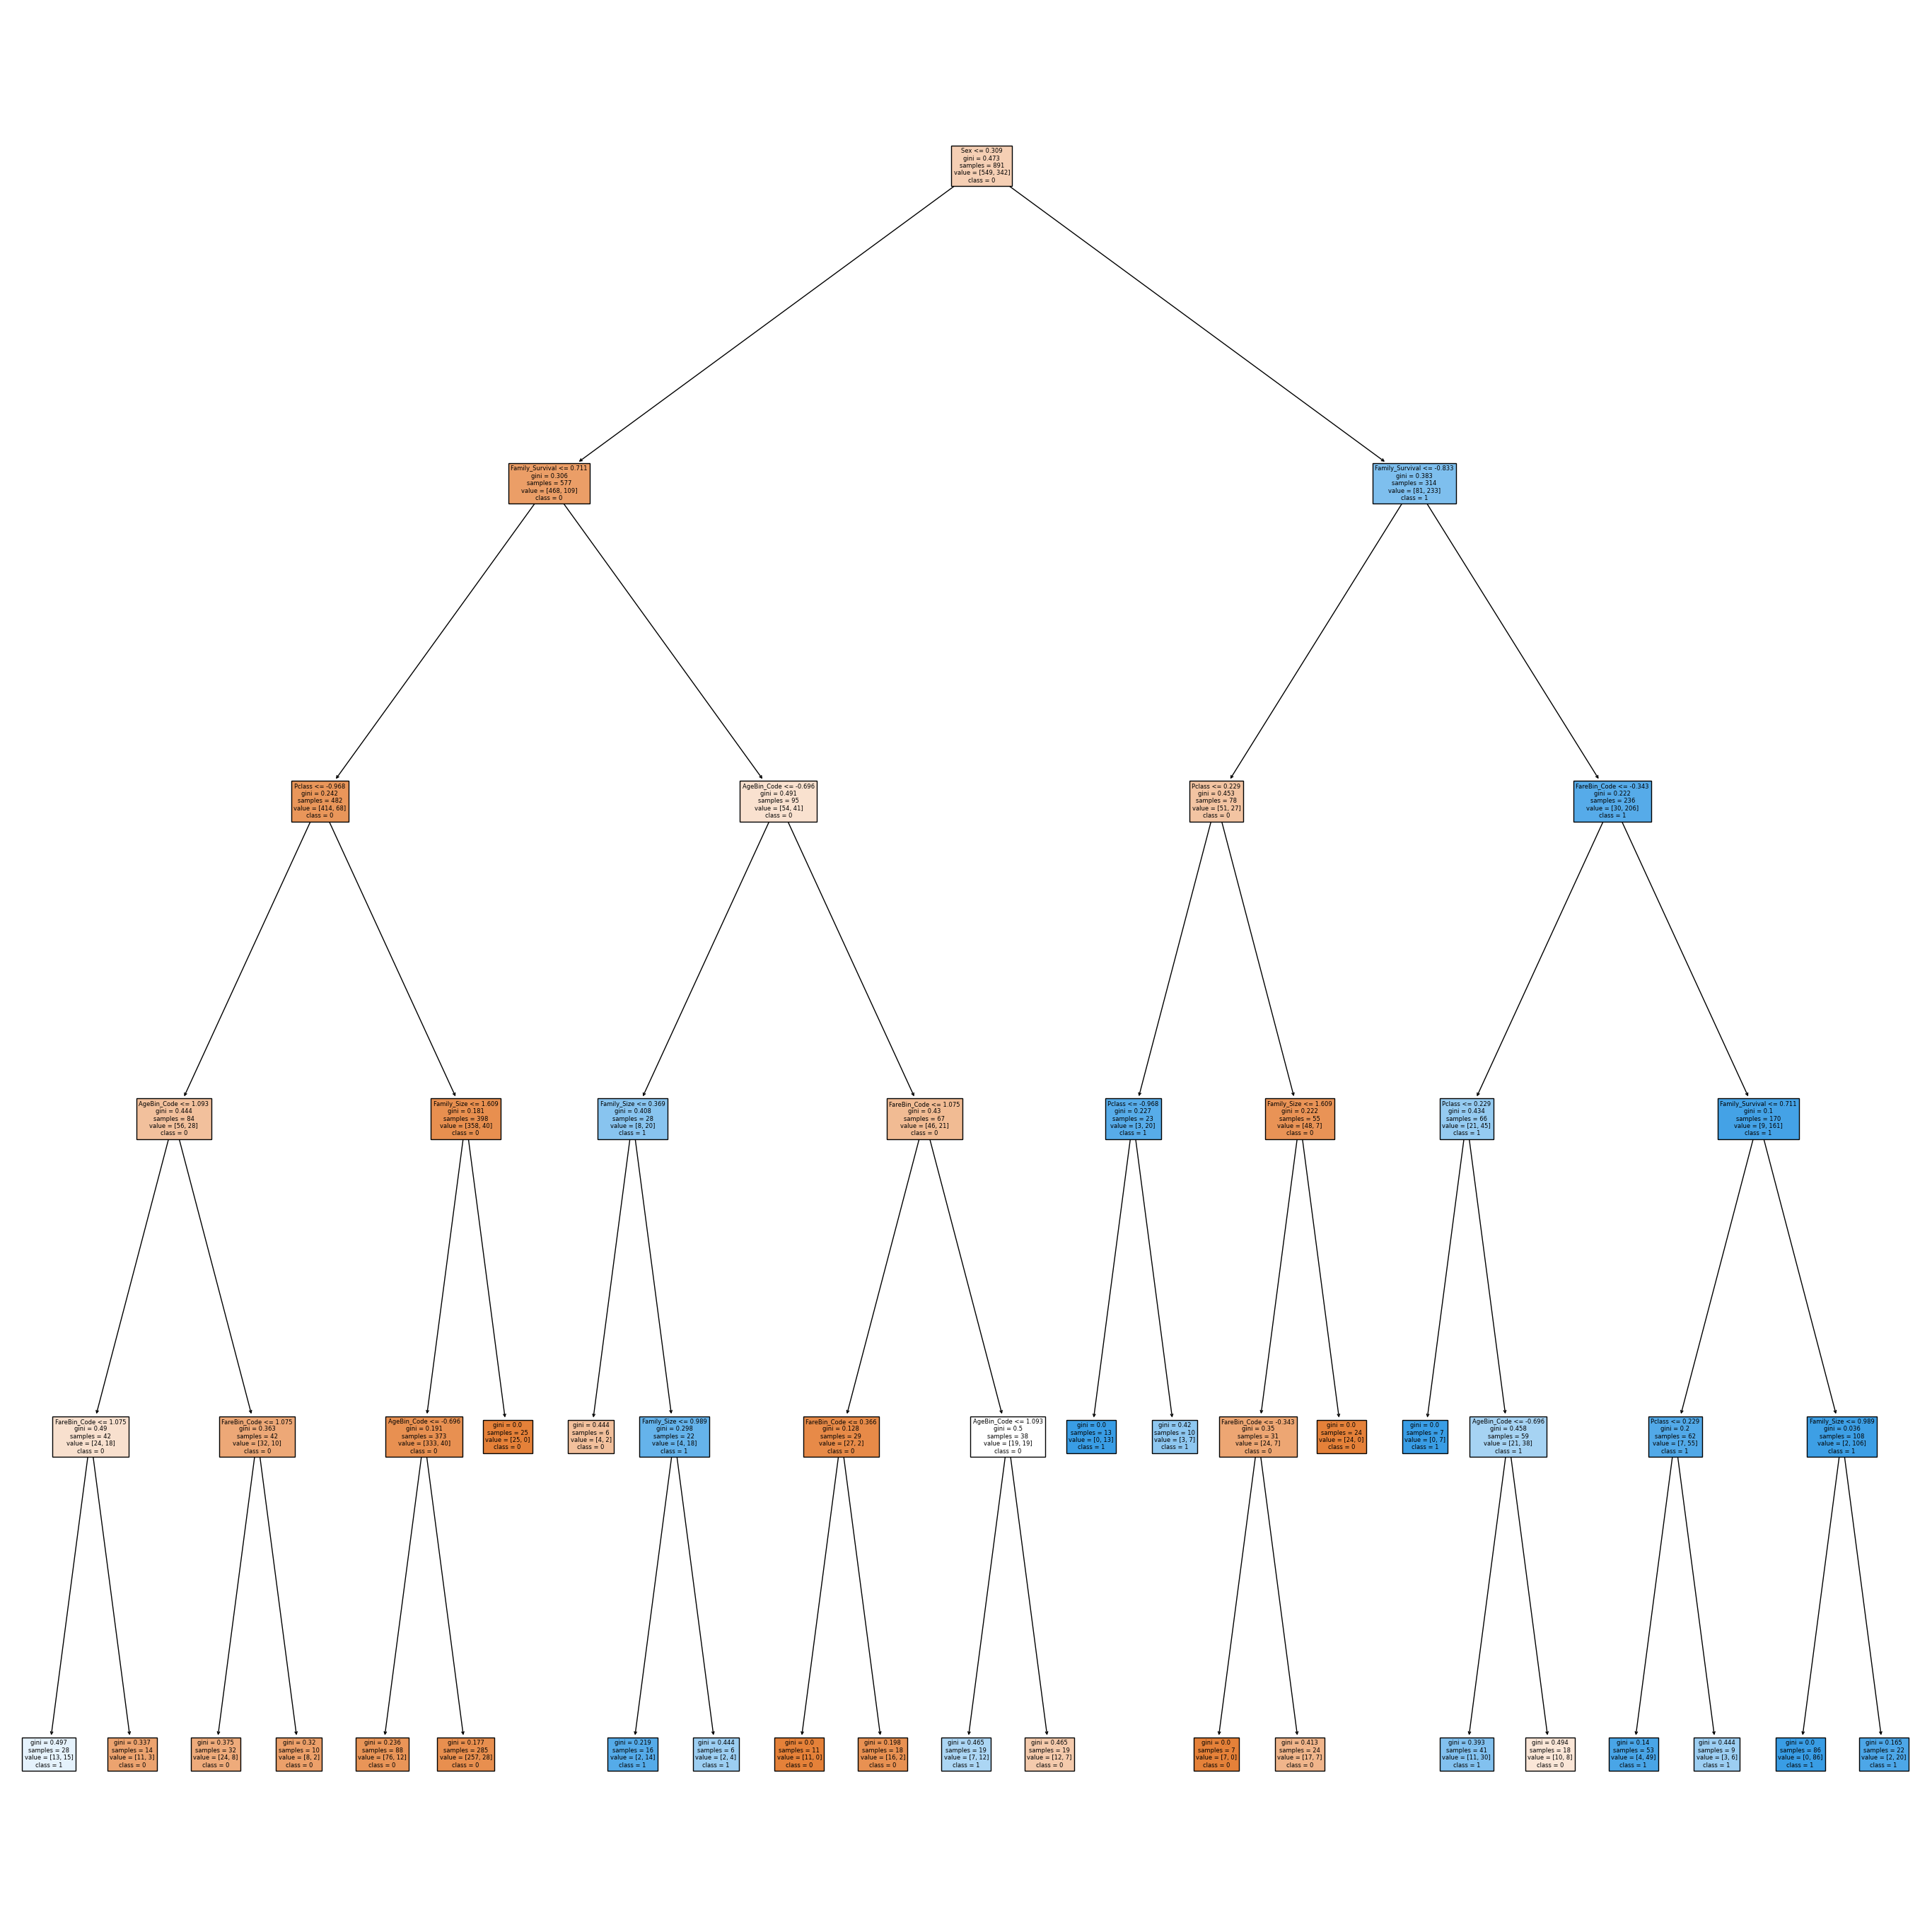

In [38]:
from sklearn import tree

fig = plt.figure(figsize=(35,35))
_ = tree.plot_tree(dt_best, feature_names=feat, filled=True, class_names=['0','1'])

In [39]:
import numpy
pred = numpy.rint(dt_best.predict(X))
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y, pred)

0.8585858585858586

In [40]:
fig.savefig("decistion_tree.png")

In [41]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=None)
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [42]:
'''acc=0
    
for train_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    #print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    acc = acc + metrics.accuracy_score(y_test, y_pred)
'''

'acc=0\n    \nfor train_index in kf.split(X):\n    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]\n    y_train , y_test = y[train_index] , y[test_index]\n    clf = clf.fit(X_train,y_train)\n    y_pred = clf.predict(X_test)\n    #print("Accuracy:", metrics.accuracy_score(y_test, y_pred))\n    acc = acc + metrics.accuracy_score(y_test, y_pred)\n'

In [43]:
kf = KFold(n_splits=5, random_state=None)
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)
acc=0
    
for train_index , test_index in kf.split(df):
    X_train , X_test = df.iloc[train_index,:],df.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    #print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    acc = acc + metrics.accuracy_score(y_test, y_pred)
    
print("Average Accuracy:", acc/5)

Average Accuracy: 0.837204193082669


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4, 5, 6, 8, 10, 20],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [5, 10, 20, 50],
    'min_samples_split': [5, 8, 10, 12],
    'n_estimators': [100, 200, 300, 500]
}
# Create a base model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [45]:
# Fit the grid search to the data
grid_search.fit(X, y)
grid_search.best_params_

Fitting 5 folds for each of 2048 candidates, totalling 10240 fits


{'bootstrap': True,
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [46]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, max_features=2, min_samples_leaf=5,
                       min_samples_split=8)

In [47]:
#rf_best = grid_search.best_params_
#import numpy


In [48]:
clf2 = RandomForestClassifier(bootstrap= True, max_depth= 5, max_features = 2, min_samples_leaf = 5, min_samples_split = 8, n_estimators = 100, random_state=42)
clf2 = clf2.fit(X, y)
acc=0

In [49]:
pred = numpy.rint(clf2.predict(X))
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y, pred)

0.8529741863075196

In [50]:
for train_index , test_index in kf.split(df):
    X_train , X_test = df.iloc[train_index,:],df.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    clf = clf2.fit(X_train,y_train)
    y_pred = clf2.predict(X_test)
    #print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    acc = acc + metrics.accuracy_score(y_test, y_pred)
    
print("Average Accuracy:", acc/5)

Average Accuracy: 0.8428661100998053
